In [290]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics  
from sklearn.preprocessing import LabelEncoder


In [291]:
df = pd.read_csv('titanic-passengers.csv', sep = ';')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [292]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [294]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [295]:
df["Cabin"].fillna(df["Cabin"].value_counts().index[0], inplace = True )


In [296]:
df["Embarked"].fillna(df["Embarked"].value_counts().index[0], inplace  =True)


In [297]:
df["Age"].fillna(df["Age"].mean(), inplace = True)

In [298]:
df_new = df.drop(["PassengerId","Name","Cabin","Ticket"], axis=1)
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,No,2,male,28.000000,0,0,13.0000,S
1,No,3,male,25.000000,0,0,7.6500,S
2,No,3,male,20.000000,0,0,7.8542,S
3,No,3,female,29.000000,0,4,21.0750,S
4,No,1,male,31.000000,1,0,52.0000,S
...,...,...,...,...,...,...,...,...
886,Yes,2,female,14.000000,1,0,30.0708,C
887,No,3,male,22.000000,0,0,7.2292,C
888,No,3,female,30.000000,0,0,8.6625,S
889,No,3,male,29.699118,0,0,7.8958,S


In [299]:

title = []
for i in df["Name"] :
  i = i.split(',')[1].split('.')[0]
  title.append(i)
title1 = pd.Series(title, name='Title')
df1 = df_new.join(title1)
df1




,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,No,2,male,28.000000,0,0,13.0000,S,Mr
1,No,3,male,25.000000,0,0,7.6500,S,Mr
2,No,3,male,20.000000,0,0,7.8542,S,Mr
3,No,3,female,29.000000,0,4,21.0750,S,Mrs
4,No,1,male,31.000000,1,0,52.0000,S,Mr
...,...,...,...,...,...,...,...,...,...
886,Yes,2,female,14.000000,1,0,30.0708,C,Mrs
887,No,3,male,22.000000,0,0,7.2292,C,Mr
888,No,3,female,30.000000,0,0,8.6625,S,Miss
889,No,3,male,29.699118,0,0,7.8958,S,Mr


In [300]:
title_dict={'Title' : 
                    {"Capt":"Officer",
                    "Col":"Officer",
                    "Major":"Officer",
                    "Dr":"Officer",
                    "Rev":"Officer",
                    "Jonkheer":"Royalty",
                    "Don":"Royalty",
                    "Sir" :"Royalty",
                    "Lady" :"Royalty",
                    "the Countess":"Royalty",
                    "Dona":"Royalty",
                    "Mme":"Miss",
                    "Mlle":"Miss",
                    "Miss" :"Miss",
                    "Ms":"Mrs",
                    "Mr" :"Mrs",
                    "Mrs" :"Mr",
                    "Master" :"Master" }}  
df_new = df1.replace(title_dict, regex = True)
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,No,2,male,28.000000,0,0,13.0000,S,Mrs
1,No,3,male,25.000000,0,0,7.6500,S,Mrs
2,No,3,male,20.000000,0,0,7.8542,S,Mrs
3,No,3,female,29.000000,0,4,21.0750,S,Mrs
4,No,1,male,31.000000,1,0,52.0000,S,Mrs
...,...,...,...,...,...,...,...,...,...
886,Yes,2,female,14.000000,1,0,30.0708,C,Mrs
887,No,3,male,22.000000,0,0,7.2292,C,Mrs
888,No,3,female,30.000000,0,0,8.6625,S,Miss
889,No,3,male,29.699118,0,0,7.8958,S,Mrs


In [301]:

df_new = df_new.drop(["SibSp","Parch"], axis=1)
df_new


,Survived,Pclass,Sex,Age,Fare,Embarked,Title
0,No,2,male,28.000000,13.0000,S,Mrs
1,No,3,male,25.000000,7.6500,S,Mrs
2,No,3,male,20.000000,7.8542,S,Mrs
3,No,3,female,29.000000,21.0750,S,Mrs
4,No,1,male,31.000000,52.0000,S,Mrs
...,...,...,...,...,...,...,...
886,Yes,2,female,14.000000,30.0708,C,Mrs
887,No,3,male,22.000000,7.2292,C,Mrs
888,No,3,female,30.000000,8.6625,S,Miss
889,No,3,male,29.699118,7.8958,S,Mrs


In [302]:
encoder = LabelEncoder()
df_new['Title'] = encoder.fit_transform(df_new['Title'])
df_new['Sex'] = encoder.fit_transform(df_new['Sex'])
df_new['Survived'] = encoder.fit_transform(df_new['Survived'])
df_new['Embarked'] = encoder.fit_transform(df_new['Embarked'])
df_new


,Survived,Pclass,Sex,Age,Fare,Embarked,Title
0,0,2,1,28.000000,13.0000,2,2
1,0,3,1,25.000000,7.6500,2,2
2,0,3,1,20.000000,7.8542,2,2
3,0,3,0,29.000000,21.0750,2,2
4,0,1,1,31.000000,52.0000,2,2
...,...,...,...,...,...,...,...
886,1,2,0,14.000000,30.0708,0,2
887,0,3,1,22.000000,7.2292,0,2
888,0,3,0,30.000000,8.6625,2,1
889,0,3,1,29.699118,7.8958,2,2


In [303]:
x=df_new.drop(["Survived"], axis=1)
y= df_new["Survived"]


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)


model = tree.DecisionTreeClassifier(criterion = "gini",splitter = "best",max_leaf_nodes=5,min_samples_leaf=5, max_depth=5)  
model.fit(x_train, y_train)   
y_pred=model.predict(x_test)  
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7932960893854749


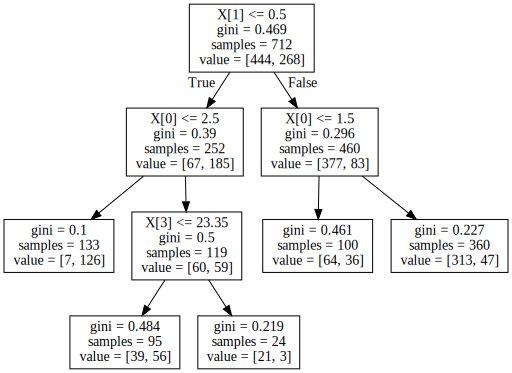

In [304]:
import graphviz
df = tree.export_graphviz(model, out_file=None)

graph = graphviz.Source(df,format='png') 
graph.render("data")
graph

- first step : we divided them by men and women ( true : women ,  false : men )
- second step : we divided the men into classes ( true : 2nd and first class , false : 3rd class ) and we divided the women into classes ( true : first class ,  false : 2nd and third class )
- third step : we divided the second and third class women into those aged less or equal to 11 years old and those aged more than 11 years old ( true : <= 11 years old ;  false > 11 years old
- for the men of the 2nd and first class whe have that 7 didn't survive and 126 survived
- for the men of the third class whe have that 60 didn't survive and 59 survived
- for the women of the  first class whe have that 64 didn't survive and 36 survived
- for the women of the  third and second class and aged less or equal than 11  old yearsd whe have that 14 didn't survive and 11 survived
- for the women of the  third and second class and aged more than 11   years old  whe have that 299 didn't survive and 36 survived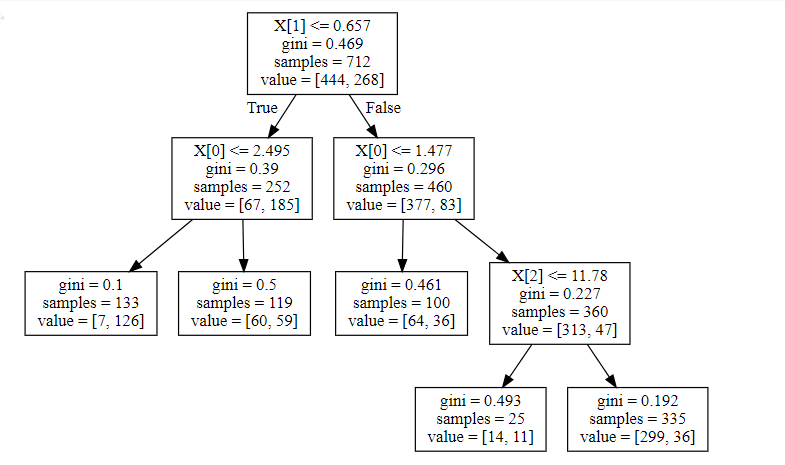

check the png image of the decision tree (in the text section) because I made another exécution of the program.

In [305]:
# I changed the parameter of the max leaf nodes from 5 to 10 
model1 = tree.DecisionTreeClassifier(criterion = "gini",splitter = "best",max_leaf_nodes=10,min_samples_leaf=5, max_depth=5)  
model1.fit(x_train, y_train)   
y_pred=model1.predict(x_test)  
print("score:{}".format(accuracy_score(y_test, y_pred)))
#the accuracy with this parameter (max_leaf_nodes = 10 ) is better than with max_leaf_nodes = 5 

score:0.7877094972067039


In [306]:
# I changed the parameter of the criterion from gini to entropy
model1 = tree.DecisionTreeClassifier(criterion = "entropy",splitter = "best",max_leaf_nodes=10,min_samples_leaf=5, max_depth=5)  
model1.fit(x_train, y_train)   
y_pred=model1.predict(x_test)  
print("score:{}".format(accuracy_score(y_test, y_pred)))
# we notice that the accuracy  is getting better 

score:0.8100558659217877


In [307]:
x=df_new.drop(["Survived"], axis=1)
y=df_new['Survived']  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3) 
clf=RandomForestClassifier(n_estimators=10)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8395522388059702


In [308]:
x=df_new.drop(["Survived"], axis=1)
y=df_new['Survived']  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3) 
clf=RandomForestClassifier(n_estimators=15)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
#I changed the n_estimator from 10 to 15 and the accuracy decreased [ most of the times]



Accuracy: 0.8246268656716418
